In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import mlflow


In [59]:
import dagshub

dagshub.init(
      repo_owner='Sandhya234-wq',
      repo_name='Drcoding_Phone_Usage_Pattern',
      mlflow=True)


mlflow.set_tracking_uri('https://dagshub.com/Sandhya234-wq/Drcoding_Phone_Usage_Pattern.mlflow')

Initialized MLflow to track repo "Sandhya234-wq/Drcoding_Phone_Usage_Pattern"

Repository Sandhya234-wq/Drcoding_Phone_Usage_Pattern initialized!

In [3]:
df = pd.read_csv("phone_usage_india.csv")

In [4]:
df.head(3)

,User ID,Age,Gender,Location,Phone Brand,OS,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),Primary Use
0,U00001,53,Male,Mumbai,Vivo,Android,3.7,23.9,37.9,104,3.9,469,5.2,4.1,803,Education
1,U00002,60,Other,Delhi,Realme,iOS,9.2,28.1,13.7,169,2.8,4997,5.1,0.4,1526,Gaming
2,U00003,37,Female,Ahmedabad,Nokia,Android,4.5,12.3,66.8,96,3.0,2381,1.7,2.9,1619,Entertainment


In [5]:
df.shape

(17686, 16)

In [6]:
df.drop(columns=['User ID'], inplace=True)

In [7]:
# Handle missing values
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

In [8]:
df[num_cols] = SimpleImputer(strategy="median").fit_transform(df[num_cols])
df[cat_cols] = SimpleImputer(strategy="most_frequent").fit_transform(df[cat_cols])


In [9]:
# Standardize text
for col in cat_cols:
    df[col] = df[col].astype(str).str.strip().str.title()


In [10]:
# Remove outliers (Z-score)
z = np.abs(stats.zscore(df[num_cols]))
df = df[(z < 3).all(axis=1)]


In [11]:
# Encode categorical for clustering
df_encoded = df.copy()
for col in cat_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

In [12]:
# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import mlflow

In [13]:
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

In [14]:
df_encoded

,Age,Gender,Location,Phone Brand,OS,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),Primary Use
0,53.0,1,8,8,0,3.7,23.9,37.9,104.0,3.9,469.0,5.2,4.1,803.0,0
1,60.0,2,3,6,1,9.2,28.1,13.7,169.0,2.8,4997.0,5.1,0.4,1526.0,2
2,37.0,0,0,3,0,4.5,12.3,66.8,96.0,3.0,2381.0,1.7,2.9,1619.0,1
3,32.0,1,9,7,0,11.0,25.6,156.2,146.0,5.2,1185.0,3.2,0.3,1560.0,1
4,16.0,1,8,9,1,2.2,2.5,236.2,86.0,5.5,106.0,3.4,2.3,742.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17681,27.0,2,8,0,1,7.2,36.6,90.4,81.0,5.1,4007.0,3.8,3.3,1380.0,1
17682,40.0,0,2,5,1,9.5,12.9,243.0,166.0,4.3,8550.0,3.4,0.7,222.0,0
17683,34.0,0,0,6,0,1.1,48.9,74.7,70.0,5.3,5516.0,0.7,4.0,1612.0,1
17684,22.0,1,4,8,0,8.8,25.6,105.6,96.0,2.4,3614.0,6.6,0.8,1528.0,4


In [15]:
X = df_encoded.drop(columns=['Primary Use'])
y = df_encoded['Primary Use']

In [16]:
# X should contain only features (no target)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)  # 2D representation of features

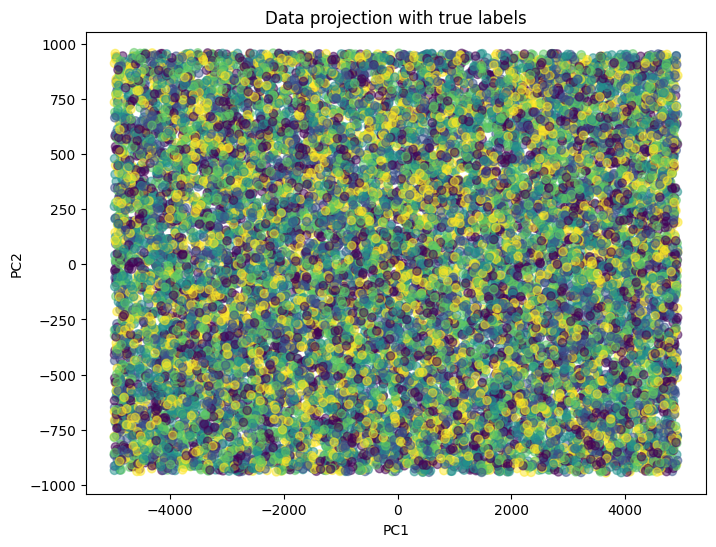

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y, cmap='viridis', alpha=0.5)
plt.title("Data projection with true labels")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [18]:
# Use only features
X_features = df_encoded.drop(columns=['Primary Use'])
kmeans = KMeans(n_clusters=3, random_state=42)


In [19]:
X_features.head(2)

,Age,Gender,Location,Phone Brand,OS,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR)
0,53.0,1,8,8,0,3.7,23.9,37.9,104.0,3.9,469.0,5.2,4.1,803.0
1,60.0,2,3,6,1,9.2,28.1,13.7,169.0,2.8,4997.0,5.1,0.4,1526.0


In [20]:
df_encoded['new'] = kmeans.fit_predict(X_features)

In [21]:
from sklearn.cluster import KMeans

wcss = []
for i in range(2, 21):
    km = KMeans(n_clusters=i, init="k-means++", random_state=42)
    km.fit(df_encoded)   # only numeric columns now
    wcss.append(km.inertia_)

In [22]:
wcss

[41504877200.649475,
 21516364843.580658,
 14699527358.017845,
 11403314142.08546,
 9594646689.04417,
 8530184599.584936,
 7856769196.833108,
 7218199711.887288,
 6580002000.493248,
 5922350926.149025,
 5352117996.44455,
 4812948352.380426,
 4362979075.020096,
 4021822614.1363697,
 3727741905.831806,
 3486174854.7572613,
 3320342667.6016226,
 3117524766.394961,
 2964807600.1813593]

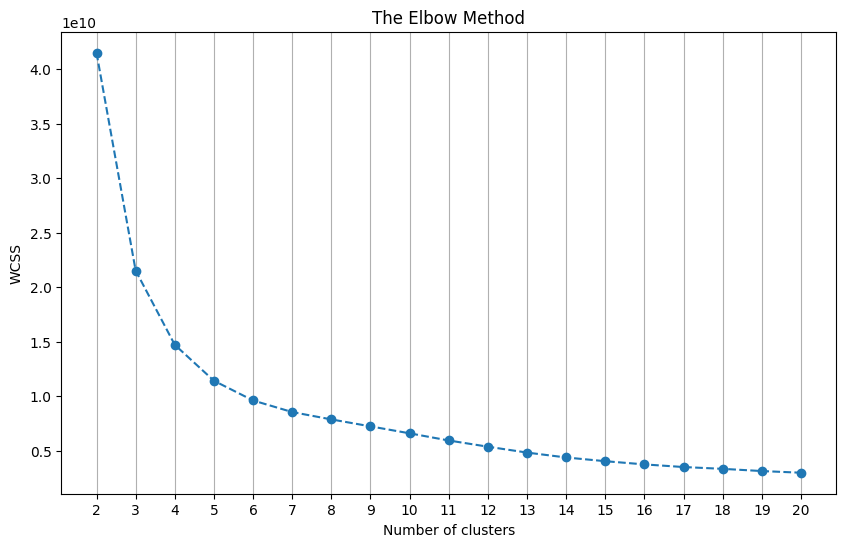

In [23]:
plt.figure(figsize=(10,6))
plt.plot(range(2, 21), wcss, marker='o', linestyle='--')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.xticks(range(2, 21))
plt.ylabel("WCSS")
plt.grid(axis='x')
plt.show()

In [24]:
df_encoded.head(2)

,Age,Gender,Location,Phone Brand,OS,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),Primary Use,new
0,53.0,1,8,8,0,3.7,23.9,37.9,104.0,3.9,469.0,5.2,4.1,803.0,0,1
1,60.0,2,3,6,1,9.2,28.1,13.7,169.0,2.8,4997.0,5.1,0.4,1526.0,2,2


In [25]:
silhouette = silhouette_score(df_encoded, df_encoded['new'])
print(f"Silhouette Score: {silhouette:.2f}")

Silhouette Score: 0.52


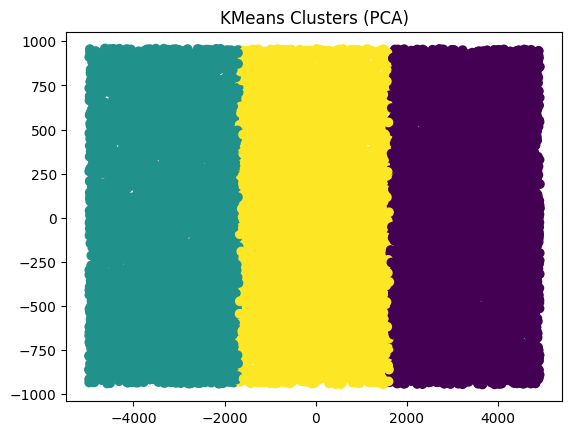

In [26]:
# PCA for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_encoded)
plt.scatter(pca_data[:,0], pca_data[:,1], c=df_encoded['new'], cmap='viridis')
plt.title("KMeans Clusters (PCA)")
plt.show()

#**Classification**

In [27]:
df_encoded.head()

,Age,Gender,Location,Phone Brand,OS,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),Primary Use,new
0,53.0,1,8,8,0,3.7,23.9,37.9,104.0,3.9,469.0,5.2,4.1,803.0,0,1
1,60.0,2,3,6,1,9.2,28.1,13.7,169.0,2.8,4997.0,5.1,0.4,1526.0,2,2
2,37.0,0,0,3,0,4.5,12.3,66.8,96.0,3.0,2381.0,1.7,2.9,1619.0,1,1
3,32.0,1,9,7,0,11.0,25.6,156.2,146.0,5.2,1185.0,3.2,0.3,1560.0,1,1
4,16.0,1,8,9,1,2.2,2.5,236.2,86.0,5.5,106.0,3.4,2.3,742.0,3,1


In [28]:
df_encoded.shape

(17686, 16)

In [29]:
# Classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

import joblib


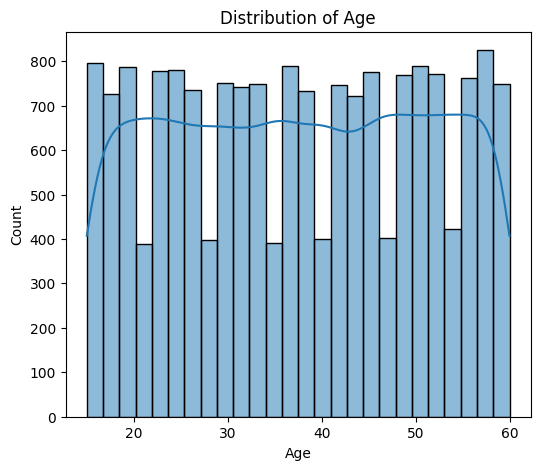

In [30]:
# EDA Plots
# Distribution plot for a numeric column
plt.figure(figsize=(6,5))
sns.histplot(df_encoded[num_cols[0]], kde=True)
plt.title(f"Distribution of {num_cols[0]}")
plt.savefig("dist_plot.png")
plt.show()

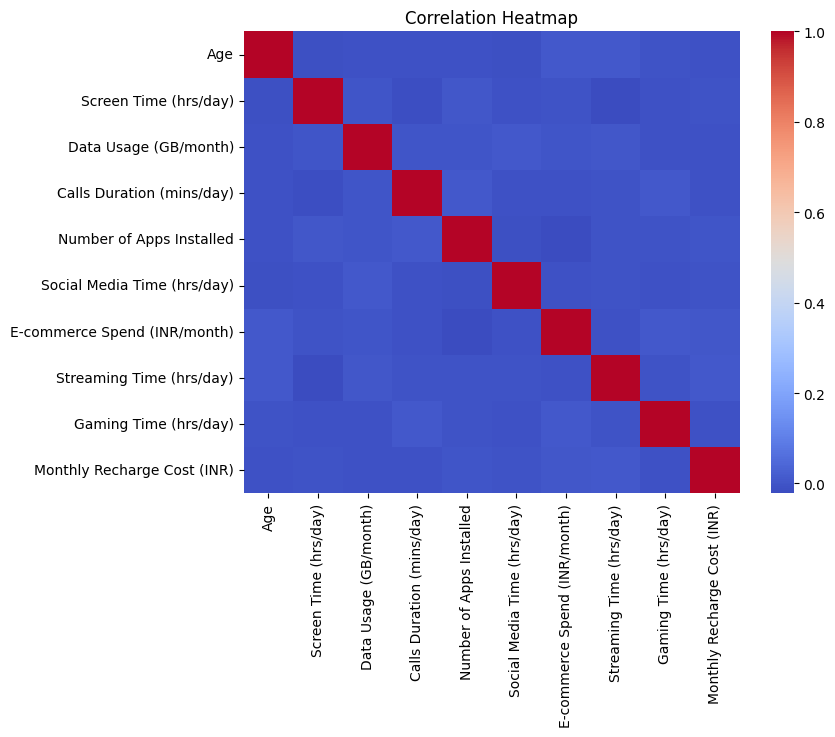

In [31]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_encoded[num_cols].corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.savefig("correlation_heatmap.png")
plt.show()

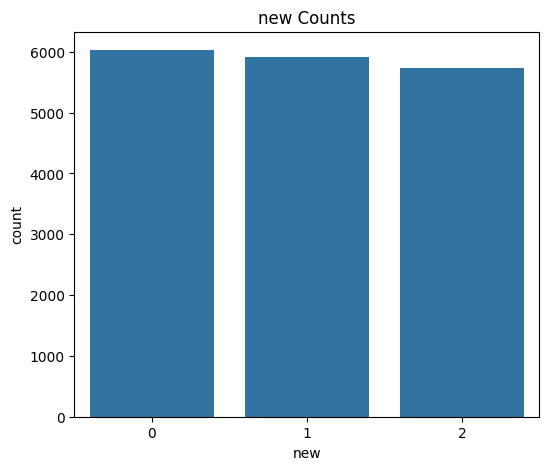

In [32]:
# Cluster count plot
plt.figure(figsize=(6,5))
sns.countplot(x="new", data=df_encoded)
plt.title("new Counts")
plt.savefig("new_count.png")
plt.show()

In [33]:
df_encoded['Primary Use'].unique()

array([0, 2, 1, 3, 4])

In [34]:
df.head()

,Age,Gender,Location,Phone Brand,OS,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),Primary Use
0,53.0,Male,Mumbai,Vivo,Android,3.7,23.9,37.9,104.0,3.9,469.0,5.2,4.1,803.0,Education
1,60.0,Other,Delhi,Realme,Ios,9.2,28.1,13.7,169.0,2.8,4997.0,5.1,0.4,1526.0,Gaming
2,37.0,Female,Ahmedabad,Nokia,Android,4.5,12.3,66.8,96.0,3.0,2381.0,1.7,2.9,1619.0,Entertainment
3,32.0,Male,Pune,Samsung,Android,11.0,25.6,156.2,146.0,5.2,1185.0,3.2,0.3,1560.0,Entertainment
4,16.0,Male,Mumbai,Xiaomi,Ios,2.2,2.5,236.2,86.0,5.5,106.0,3.4,2.3,742.0,Social Media


In [132]:
df1 = pd.read_csv("phone_usage_india.csv")

In [133]:
df1.head(2)

,User ID,Age,Gender,Location,Phone Brand,OS,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),Primary Use
0,U00001,53,Male,Mumbai,Vivo,Android,3.7,23.9,37.9,104,3.9,469,5.2,4.1,803,Education
1,U00002,60,Other,Delhi,Realme,iOS,9.2,28.1,13.7,169,2.8,4997,5.1,0.4,1526,Gaming


In [ ]:
""" df1.drop(columns=['User ID'], inplace=True)"""

In [109]:
from sklearn.preprocessing import LabelEncoder



In [40]:
 """ df_encoded1 = df1.copy()
for col in df_encoded1.select_dtypes(include='object').columns:
    df_encoded1[col] = LabelEncoder().fit_transform(df1[col])"""

" df_encoded1 = df1.copy()\nfor col in df_encoded1.select_dtypes(include='object').columns:\n   df_encoded1[col] = LabelEncoder().fit_transform(df1[col])"

In [41]:
"""df_encoded1.head(2)"""

'df_encoded1.head(2)'

In [42]:
"""df_encoded1['Primary Use'].unique()"""

"df_encoded1['Primary Use'].unique()"

In [43]:
# df_encoded1['Primary Use'] = pd.DataFrame(df_encoded1['Primary Use'])

In [44]:
"""x = df_encoded1.drop(columns=['Primary Use'])
y = df_encoded1['Primary Use'] # Revert y to a Series"""

"x = df_encoded1.drop(columns=['Primary Use'])\ny = df_encoded1['Primary Use'] # Revert y to a Series"

In [ ]:
"""#Map categories to binary values
mapping = {
    'Education': 1,
    'Work': 2,
    'Entertainment': 0,
    'Social Media': 0,
    'Gaming': 0
}"""


In [ ]:
"""df1['Category_binary'] = df1['Primary Use'].map(mapping) """

In [111]:
df1.head(2)

,User ID,Age,Gender,Location,Phone Brand,OS,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),Primary Use
0,U00001,53,Male,Mumbai,Vivo,Android,3.7,23.9,37.9,104,3.9,469,5.2,4.1,803,Education
1,U00002,60,Other,Delhi,Realme,iOS,9.2,28.1,13.7,169,2.8,4997,5.1,0.4,1526,Gaming


In [134]:
""" df1.drop(columns=['Primary Use'], inplace=True)"""

" df1.drop(columns=['Primary Use'], inplace=True)"

In [135]:
x = df1.drop(columns=['Primary Use'])
y = df1['Primary Use'] # Revert y to a Series

In [138]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [140]:
numeric_features = x.select_dtypes(include=np.number).columns
categorical_features = x.select_dtypes(exclude=np.number).columns

In [144]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])


In [145]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [146]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [147]:
# Models to try
models = {
    "Logistic Regression": LogisticRegression(max_iter=100),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100 , random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, random_state=42)



}


In [148]:
pipeline = Pipeline([
    ('preprocessor', preprocessor), 
    ('classifier', models)       
])


In [150]:
import mlflow

In [151]:
# MLflow Experiment
mlflow.set_experiment("Drcoding_Phone_Usage_Pattern")
if mlflow.active_run():
    mlflow.end_run()

In [ ]:
if mlflow.active_run():
    mlflow.end_run()

for name, model in models.items():
    with mlflow.start_run(run_name=name):
        
        # Build pipeline
        pipe = Pipeline(steps=[
            ("preprocessor", preprocessor),
            ("classifier", model)
        ])
        
        # Train model
        pipe.fit(X_train, y_train)
        
        # Predictions & Accuracy
        y_pred = pipe.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        
        # Log metric to MLflow
        mlflow.log_metric("accuracy", acc)
        
        print(f"{name} Accuracy: {acc:.4f}")
        


Logistic Regression Accuracy: 0.2004
🏃 View run Logistic Regression at: https://dagshub.com/Sandhya234-wq/Drcoding_Phone_Usage_Pattern.mlflow/#/experiments/0/runs/ff0c1ddea9444875b19525961cc4173f
🧪 View experiment at: https://dagshub.com/Sandhya234-wq/Drcoding_Phone_Usage_Pattern.mlflow/#/experiments/0
Decision Tree Accuracy: 0.2052
🏃 View run Decision Tree at: https://dagshub.com/Sandhya234-wq/Drcoding_Phone_Usage_Pattern.mlflow/#/experiments/0/runs/846449d3dbc74469abc33866a0addb1e
🧪 View experiment at: https://dagshub.com/Sandhya234-wq/Drcoding_Phone_Usage_Pattern.mlflow/#/experiments/0
Random Forest Accuracy: 0.1987
🏃 View run Random Forest at: https://dagshub.com/Sandhya234-wq/Drcoding_Phone_Usage_Pattern.mlflow/#/experiments/0/runs/9c92099ca6f04cbfa6f10c30b132b8f2
🧪 View experiment at: https://dagshub.com/Sandhya234-wq/Drcoding_Phone_Usage_Pattern.mlflow/#/experiments/0
Gradient Boosting Accuracy: 0.1981
🏃 View run Gradient Boosting at: https://dagshub.com/Sandhya234-wq/Drcoding_P

In [154]:
model = None
best_acc = acc

In [156]:
# Save best model
if acc > best_acc:
    best_acc = acc
    best_model_name = name
    best_pipeline = pipe

In [158]:
best_pipeline = pipe

In [ ]:
if best_pipeline is not None:
    joblib.dump(best_pipeline, "best_phone_usage_model2.joblib")


NameError: name 'best_model_name' is not defined

In [125]:
model_path = f"{name}_model.joblib"
joblib.dump(pipe, model_path)

['Gradient Boosting_model.joblib']

In [126]:
mlflow.log_artifact(model_path)

In [89]:
import os

In [92]:
for plot_file in ["dist_plot.png", "correlation_heatmap.png", "new_count.png"]:
     if os.path.exists(plot_file):
         mlflow.log_artifact(plot_file)

In [93]:
import joblib

# Log accuracy metric
mlflow.log_metric(f"{name}_accuracy", acc)

# Save model locally as joblib
model_path = f"{name}_model.joblib"
joblib.dump(pipe, model_path)

# Log the saved model as an artifact (Dagshub supports this)
mlflow.log_artifact(model_path)

# Log EDA plots
mlflow.log_artifact("dist_plot.png")
mlflow.log_artifact("correlation_heatmap.png")
mlflow.log_artifact("new_count.png")

In [94]:
        # Print tracking link
        # Print link
experiment_id = mlflow.active_run().info.experiment_id
run_id = mlflow.active_run().info.run_id
print(f"[{name}] Tracking URL: {mlflow.get_tracking_uri()}/#/experiments/{experiment_id}/runs/{run_id}")

[Gradient Boosting] Tracking URL: https://dagshub.com/Sandhya234-wq/Drcoding_Phone_Usage_Pattern.mlflow/#/experiments/0/runs/728f18c12f61470da730441ce18cacef


In [68]:
print(f"\n{name} Accuracy: {acc:.4f}")
print(classification_report(y_test, y_pred))


Gradient Boosting Accuracy: 0.6015
              precision    recall  f1-score   support

           0       0.60      0.99      0.75      2132
           1       0.29      0.01      0.02       726
           2       0.45      0.01      0.01       680

    accuracy                           0.60      3538
   macro avg       0.45      0.34      0.26      3538
weighted avg       0.51      0.60      0.46      3538



In [103]:
model = None
best_acc = acc

In [104]:
if acc > best_acc:
  best_acc = acc
  best_model = pipe

In [127]:
print(f"\n Best Model Accuracy: {best_acc:.4f}")


 Best Model Accuracy: 0.6015


In [106]:
joblib.dump(best_model, "best_phone_usage_model.joblib")

['best_phone_usage_model.joblib']